# study on breast cancer classification

<h3> predicting cancer whether it is malignant or benign on several features in this case 30 characteristics

PROBLEM STATEMENT

    Predicting if the cancer diagnosis is benign or malignant based on several observations/features

    30 features are used, examples: 
    - radius (mean of distances from center to points on the perimeter) 
    - texture (standard deviation of gray-scale values) 
    - perimeter 
    - area 
    - smoothness (local variation in radius lengths) 
    - compactness (perimeter^2 / area - 1.0) 
    - concavity (severity of concave portions of the contour) 
    - concave points (number of concave portions of the contour) 
    - symmetry 
    - fractal dimension ("coastline approximation" - 1)

    Datasets are linearly separable using all 30 input features

    Number of Instances: 569

    Class Distribution: 212 Malignant, 357 Benign

    Target class: - Malignant - Benign


In [1]:
# project is on detecting breast cancer of a person based on some characters they exhibit in the images taken
# classify as malignant or benign based on some features
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data from the dataset in sklearn dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# shows the dictionaries present in the data
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
# print the above, for example - use DESCR - we can use the any field in the above data dictionary
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
# to find the rows and columns present
cancer['data'].shape

(569, 30)

In [12]:
# create a df with the feature names os column names
df_cancer = pd.DataFrame(cancer.data, columns = cancer['feature_names'])

df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [13]:
# add the column target to the dataframe - convert to a list and add
df_cancer['target'] = cancer ['target'].tolist()
#df['new_column'] = array_name.tolist()
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [101]:
df_cancer.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

In [16]:
# convert the df type to float
df_cancer = df_cancer.astype(float)
print(df_cancer.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [10]:
df_cancer.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

# data visualization

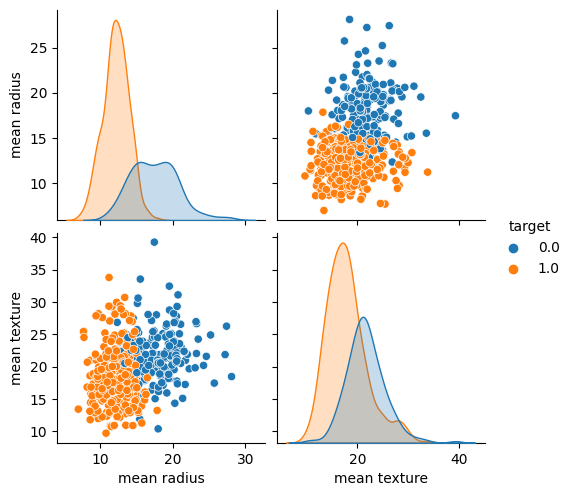

In [17]:
# plots based on two features and can be compared - 'mean radius', 'mean texture'
sns.pairplot(data = df_cancer, hue = 'target', vars = ['mean radius', 'mean texture'])

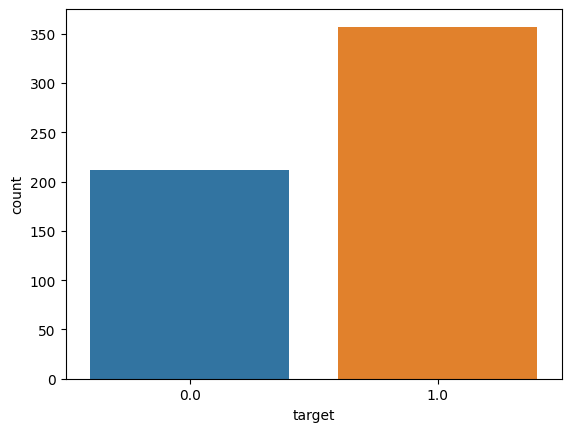

In [20]:
# shows the target variable in a plot
sns.countplot(x = df_cancer['target'], data = df_cancer)

plt.show()
#sns.countplot(x ='sex', data = df)

In [21]:
# for plotting two features in scatter plot
sns.scatterplot(x = df_cancer['mean area'], y= df_cancer['mean smoothness'], hue = 'target', data = df_cancer)
plt.show()

In [22]:
# find the correlation between features - annt = True: to display the correlation values
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot = True)
plt.show()

# Analysis

In [27]:
# drop the column 'target' as it is not required for analysis
X = df_cancer.drop(['target'], axis = 1)

In [28]:
X


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [29]:
# include the taget column in another variable
y=df_cancer['target']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# split the data into training and test data with 80% going towards training and 20% towards test data, 
# random state makes the split same when we run multiple times 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [32]:
X_train

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
306       13.200         15.82           84.07      537.3          0.08511   
410       11.360         17.57           72.49      399.8          0.08858   
197       18.080         21.84          117.40     1024.0          0.07371   
376       10.570         20.22           70.15      338.3          0.09073   
244       19.400         23.50          129.10     1155.0          0.10270   
..           ...           ...             ...        ...              ...   
8         13.000         21.82           87.50      519.8          0.12730   
73        13.800         15.79           90.43      584.1          0.10070   
400       17.910         21.02          124.40      994.0          0.12300   
118       15.780         22.91          105.70      782.6          0.11550   
206        9.876         17.27           62.92      295.4          0.10890   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
306           0.05251        0.001461             0.003261         0.1632   
410           0.05313        0.027830             0.021000         0.1601   
197           0.08642        0.110300             0.057780         0.1770   
376           0.16600        0.228000             0.059410         0.2188   
244           0.15580        0.204900             0.088860         0.1978   
..                ...             ...                  ...            ...   
8             0.19320        0.185900             0.093530         0.2350   
73            0.12800        0.077890             0.050690         0.1662   
400           0.25760        0.318900             0.119800         0.2113   
118           0.17520        0.213300             0.094790         0.2096   
206           0.07232        0.017560             0.019520         0.1934   

     mean fractal dimension  ...  worst radius  worst texture  \
306                 0.05894  ...         14.41          20.45   
410                 0.05913  ...         13.05          36.32   
197                 0.05340  ...         19.76          24.70   
376                 0.08450  ...         10.85          22.82   
244                 0.06000  ...         21.65          30.53   
..                      ...  ...           ...            ...   
8                   0.07389  ...         15.49          30.73   
73                  0.06566  ...         16.57          20.86   
400                 0.07115  ...         20.80          27.78   
118                 0.07331  ...         20.19          30.50   
206                 0.06285  ...         10.42          23.22   

     worst perimeter  worst area  worst smoothness  worst compactness  \
306            92.00       636.9           0.11280             0.1346   
410            85.07       521.3           0.14530             0.1622   
197           129.10      1228.0           0.08822             0.1963   
376            76.51       351.9           0.11430             0.3619   
244           144.90      1417.0           0.14630             0.2968   
..               ...         ...               ...                ...   
8             106.20       739.3           0.17030             0.5401   
73            110.30       812.4           0.14110             0.3542   
400           149.60      1304.0           0.18730             0.5917   
118           130.30      1272.0           0.18550             0.4925   
206            67.08       331.6           0.14150             0.1247   

     worst concavity  worst concave points  worst symmetry  \
306          0.01120               0.02500          0.2651   
410          0.18110               0.08698          0.2973   
197          0.25350               0.09181          0.2369   
376          0.60300               0.14650          0.2597   
244          0.34580               0.15640          0.2920   
..               ...                   ...             ...   
8            0.53900               0.20600         

In [35]:
# lets use then SVC model for classification 
# and classification_report, confusion_matrix for reporting from metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
svc_model = SVC()

In [37]:
# fit ensures how well our model works on general data 
svc_model.fit(X_train, y_train)

SVC()

# model evaluation

In [42]:
# lets predict based on the fitted data earlier
# the data is not used for training - this data is new - informs us how well our model works
y_predict = svc_model.predict(X_test)

In [43]:
y_predict

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [44]:
cm = confusion_matrix(y_test, y_predict)

In [45]:
sns.heatmap(cm, annot = True)
plt.show()

In [50]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_test_svm = accuracy_score(y_test, y_predict)
accuracy_test_svm

0.9385964912280702

# improving the model - normalizing the data

<h3> using stand scaler

In [51]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
svm_clf_scaled = SVC(random_state=42)
svm_clf_scaled.fit(X_train_scaled, y_train)

y_pred_test_svm_scaled = svm_clf_scaled.predict(X_test_scaled)

accuracy_test_svm_scaled = accuracy_score(y_test, y_pred_test_svm_scaled)

print("SVM - with feature scaling")
print("Test accuracy:", accuracy_test_svm_scaled)

SVM - with feature scaling
Test accuracy: 0.9649122807017544


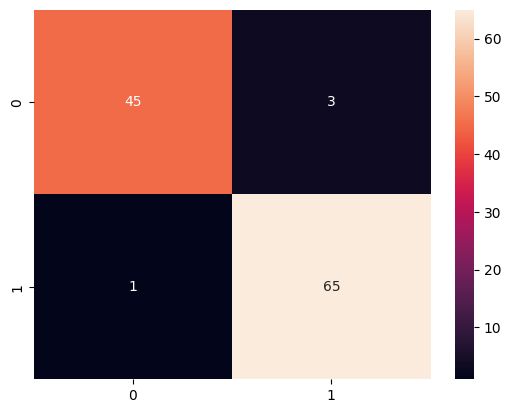

In [73]:
cm = confusion_matrix(y_test, y_pred_test_svm_scaled)
sns.heatmap(cm, annot = True)
plt.show()

In [78]:
print(classification_report(y_test, y_pred_test_svm_scaled))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        48
         1.0       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<h3> using minmax scaler

In [53]:


from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

svm_clf_minmax = SVC(random_state=42)
svm_clf_minmax.fit(X_train_minmax, y_train)

y_pred_test_svm_minmax = svm_clf_minmax.predict(X_test_minmax)

accuracy_test_svm_minmax = accuracy_score(y_test, y_pred_test_svm_minmax)

print("SVM - with MinMaxScaler")
print("Test accuracy:", accuracy_test_svm_minmax)

SVM - with MinMaxScaler
Test accuracy: 0.9824561403508771


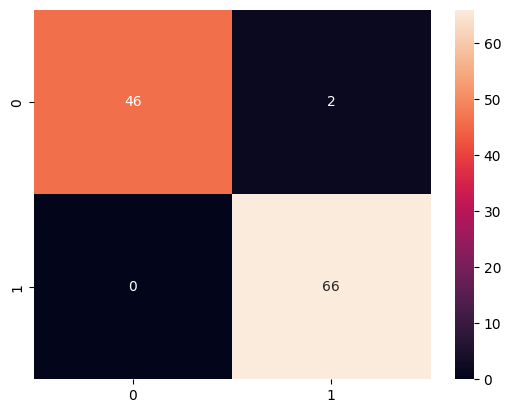

In [71]:
cm = confusion_matrix(y_test, y_pred_test_svm_minmax)
sns.heatmap(cm, annot = True)
plt.show()

In [77]:
print(classification_report(y_test, y_pred_test_svm_minmax))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<h3> using robust scaler

In [55]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

svm_clf_robust = SVC(random_state=42)
svm_clf_robust.fit(X_train_robust, y_train)

y_pred_test_svm_robust = svm_clf_robust.predict(X_test_robust)

accuracy_test_svm_robust = accuracy_score(y_test, y_pred_test_svm_robust)

print("SVM - with RobustScaler")
print("Test accuracy:", accuracy_test_svm_robust)

SVM - with RobustScaler
Test accuracy: 0.9649122807017544


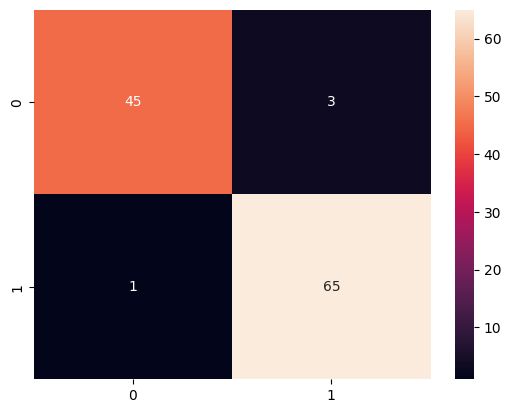

In [72]:
cm = confusion_matrix(y_test, y_pred_test_svm_robust)
sns.heatmap(cm, annot = True)
plt.show()

In [76]:
print(classification_report(y_test, y_pred_test_svm_robust))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        48
         1.0       0.96      0.98      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



the accuracy is lower using the robust scaler (scales the features based on the median and interquartile range (IQR), making it robust to outliers)

<h3> using normalizer

In [56]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

svm_clf_normalized = SVC(random_state=42)
svm_clf_normalized.fit(X_train_normalized, y_train)

y_pred_test_svm_normalized = svm_clf_normalized.predict(X_test_normalized)

accuracy_test_svm_normalized = accuracy_score(y_test, y_pred_test_svm_normalized)

print("SVM - with normalization")
print("Test accuracy:", accuracy_test_svm_normalized)

SVM - with normalization
Test accuracy: 0.8508771929824561


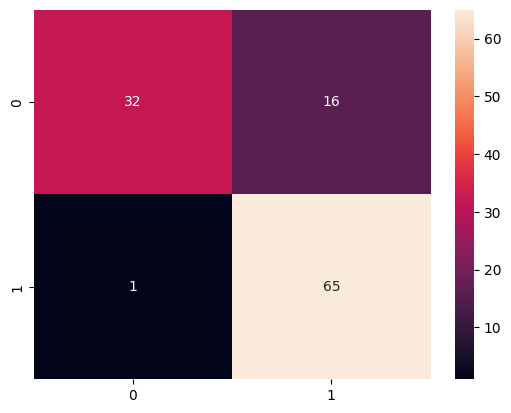

In [74]:
cm = confusion_matrix(y_test, y_pred_test_svm_normalized)
sns.heatmap(cm, annot = True)
plt.show()

In [75]:
print(classification_report(y_test, y_pred_test_svm_normalized))

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79        48
         1.0       0.80      0.98      0.88        66

    accuracy                           0.85       114
   macro avg       0.89      0.83      0.84       114
weighted avg       0.87      0.85      0.84       114



the accuracy is lower using normalization - looks like the 'min max' scaling is the best model

# the model with c and gamma parameters


In [58]:
param_grid = {'C': [.1,1,10,100], 'gamma': [1,.1,.01,.001], 'kernel': ['rbf']}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
#param_grid = {'C': [.1,1,10,100], 'gamma': [1,.1,.01,.001]}


In [61]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=4)

In [62]:
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [63]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
grid_predictions = grid.predict(X_test_scaled)

In [65]:
cm = confusion_matrix(y_test, grid_predictions)

In [66]:
sns.heatmap(cm, annot = True)
plt.show()

In [67]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59        48
         1.0       0.00      0.00      0.00        66

    accuracy                           0.42       114
   macro avg       0.21      0.50      0.30       114
weighted avg       0.18      0.42      0.25       114



C:\Users\ycmal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ycmal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ycmal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

the accuracy is lower using c and gamma parameters - looks like the 'min max' scaling is the best model